# Testing image3 steps with MIRI simulated data

## Summary

This notebook processes level 2 images through the calwebb_image3 pipeline.

1) Read in images.

2) Set up association file.

3) Run image3 pipeline with association file as input.

4) Display and examine combined image.


The pipeline documentation can be found here: https://jwst-pipeline.readthedocs.io/en/latest/

The pipeline code is available on GitHub: https://github.com/spacetelescope/jwst

Author: T. Temim

In [1]:
# Create a temporary directory to hold notebook output, and change the working directory to that directory.
from tempfile import TemporaryDirectory
import os
data_dir = TemporaryDirectory()
os.chdir(data_dir.name)

### Set up import statements

In [2]:
import pytest
from astropy.io import fits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import jwst
import json
#from jwst.pipeline import Image2Pipeline
#from jwst.pipeline import Image3Pipeline
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base
from jwst.pipeline import calwebb_image3
from jwst.pipeline import calwebb_image2
from jwst.pipeline import calwebb_detector1
from jwst.pipeline import Image3Pipeline
from jwst.associations import asn_from_list
from jwst import datamodels
from matplotlib import rcParams
from ci_watson.artifactory_helpers import get_bigdata

2021-04-22 20:54:48,491 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/photutils/detection/findstars.py:33: AstropyDeprecationWarning: _StarFinderKernel was moved to the photutils.detection._utils module. Please update your import statement.
  warnings.warn(f'{name} was moved to the {deprecated[name]} module. '



In [3]:
import os
os.environ['CRDS_CONTEXT']='jwst_0619.pmap'
os.environ['CRDS_PATH'] = os.getcwd()

### Print pipeline version number

In [4]:
jwst.__version__ 

'1.1.0'

### Set up data path and image list file

In [5]:
print("Downloading input file 1")
input_file1 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits')
print("Downloading input file 2")
input_file2 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 3")
input_file3 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal.fits')
print("Downloading input file 4")
input_file4 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 5")
input_file5 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 6")
input_file6 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 7")
input_file7 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 8")
input_file8 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Finished Downloads")
input_files=[input_file1,input_file2,input_file3,input_file4,input_file5,input_file6,input_file7,input_file8]

Finished Downloads


### Set up association files

In [6]:
# use asn_from_list to create association table
cal_list=input_files
asn = asn_from_list.asn_from_list(cal_list, rule=DMS_Level3_Base, product_name='image3_combined.fits')

# use this if you need to add non'science' exposure types
#asn['products'][0]['members'][1]['exptype'] = 'background'
#asn['products'][0]['members'][2]['exptype'] = 'sourcecat'

# dump association table to a .json file for use in image3
with open('image3_asnfile.json', 'w') as fp:
    fp.write(asn.dump()[1])

image3_json_file='image3_asnfile.json'
    
json_file = image3_json_file
file_list = []
file_list2 = []
with open(json_file) as json_data:
    d = json.load(json_data)
    members = d['products'][0]['members']
    for item in np.arange(0,len(members)):
        file_list.append(members[item]['expname'])
        file_list2.append(members[item]['expname'][:-5]+"_image3.fits")

### Run input data through image3 pipeline

In [7]:
im3 = calwebb_image3.Image3Pipeline()
im3.save_results = True
im3.run('image3_asnfile.json')

2021-04-22 20:54:52,756 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.


2021-04-22 20:54:52,758 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.


2021-04-22 20:54:52,759 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep instance created.


2021-04-22 20:54:52,761 - stpipe.Image3Pipeline.skymatch - INFO - SkyMatchStep instance created.


2021-04-22 20:54:52,762 - stpipe.Image3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.


2021-04-22 20:54:52,764 - stpipe.Image3Pipeline.resample - INFO - ResampleStep instance created.


2021-04-22 20:54:52,765 - stpipe.Image3Pipeline.source_catalog - INFO - SourceCatalogStep instance created.


2021-04-22 20:54:52,860 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline running with args ('image3_asnfile.json',).


2021-04-22 20:54:52,866 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'steps': {'assign_mtwcs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': ''}, 'tweakreg': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest'

2021-04-22 20:54:53,816 - stpipe.Image3Pipeline - INFO - Prefetching reference files for dataset: 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits' reftypes = ['abvegaoffset', 'apcorr', 'drizpars']


2021-04-22 20:54:54,573 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_system_datalvl_0002.rmap      694 bytes  (1 / 135 files) (0 / 335.8 K bytes)


2021-04-22 20:54:54,599 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_system_calver_0022.rmap    2.4 K bytes  (2 / 135 files) (694 / 335.8 K bytes)


2021-04-22 20:54:54,618 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_system_0021.imap      385 bytes  (3 / 135 files) (3.1 K / 335.8 K bytes)


2021-04-22 20:54:54,637 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_wavelengthrange_0016.rmap    1.1 K bytes  (4 / 135 files) (3.5 K / 335.8 K bytes)


2021-04-22 20:54:54,655 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_wavecorr_0003.rmap      833 bytes  (5 / 135 files) (4.6 K / 335.8 K bytes)


2021-04-22 20:54:54,675 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_superbias_0038.rmap   15.8 K bytes  (6 / 135 files) (5.5 K / 335.8 K bytes)


2021-04-22 20:54:54,696 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_sflat_0009.rmap    8.5 K bytes  (7 / 135 files) (21.2 K / 335.8 K bytes)


2021-04-22 20:54:54,717 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_saturation_0017.rmap    2.0 K bytes  (8 / 135 files) (29.7 K / 335.8 K bytes)


2021-04-22 20:54:54,737 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_refpix_0014.rmap    1.5 K bytes  (9 / 135 files) (31.7 K / 335.8 K bytes)


2021-04-22 20:54:54,756 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_readnoise_0015.rmap    1.8 K bytes  (10 / 135 files) (33.2 K / 335.8 K bytes)


2021-04-22 20:54:54,776 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_photom_0012.rmap      907 bytes  (11 / 135 files) (35.0 K / 335.8 K bytes)


2021-04-22 20:54:54,797 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_pathloss_0003.rmap      932 bytes  (12 / 135 files) (36.0 K / 335.8 K bytes)


2021-04-22 20:54:54,817 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_ote_0019.rmap    1.0 K bytes  (13 / 135 files) (36.9 K / 335.8 K bytes)


2021-04-22 20:54:54,835 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_msaoper_0003.rmap      783 bytes  (14 / 135 files) (37.9 K / 335.8 K bytes)


2021-04-22 20:54:54,855 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_msa_0017.rmap    1.0 K bytes  (15 / 135 files) (38.7 K / 335.8 K bytes)


2021-04-22 20:54:54,873 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_mask_0021.rmap    1.5 K bytes  (16 / 135 files) (39.7 K / 335.8 K bytes)


2021-04-22 20:54:54,893 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_linearity_0017.rmap    1.6 K bytes  (17 / 135 files) (41.2 K / 335.8 K bytes)


2021-04-22 20:54:54,914 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_ipc_0006.rmap      876 bytes  (18 / 135 files) (42.8 K / 335.8 K bytes)


2021-04-22 20:54:54,934 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_ifuslicer_0007.rmap      733 bytes  (19 / 135 files) (43.6 K / 335.8 K bytes)


2021-04-22 20:54:54,952 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_ifupost_0009.rmap      719 bytes  (20 / 135 files) (44.4 K / 335.8 K bytes)


2021-04-22 20:54:54,970 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_ifufore_0007.rmap      719 bytes  (21 / 135 files) (45.1 K / 335.8 K bytes)


2021-04-22 20:54:54,990 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_gain_0019.rmap    1.8 K bytes  (22 / 135 files) (45.8 K / 335.8 K bytes)


2021-04-22 20:54:55,010 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_fpa_0017.rmap    1.0 K bytes  (23 / 135 files) (47.6 K / 335.8 K bytes)


2021-04-22 20:54:55,029 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_fore_0016.rmap    3.4 K bytes  (24 / 135 files) (48.6 K / 335.8 K bytes)


2021-04-22 20:54:55,049 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_flat_0012.rmap    3.6 K bytes  (25 / 135 files) (52.0 K / 335.8 K bytes)


2021-04-22 20:54:55,069 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_fflat_0007.rmap    3.3 K bytes  (26 / 135 files) (55.6 K / 335.8 K bytes)


2021-04-22 20:54:55,090 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_extract1d_0010.rmap    1.2 K bytes  (27 / 135 files) (58.9 K / 335.8 K bytes)


2021-04-22 20:54:55,109 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_disperser_0018.rmap    3.9 K bytes  (28 / 135 files) (60.1 K / 335.8 K bytes)


2021-04-22 20:54:55,127 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_dflat_0004.rmap    1.0 K bytes  (29 / 135 files) (64.0 K / 335.8 K bytes)


2021-04-22 20:54:55,144 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_dark_0031.rmap   14.4 K bytes  (30 / 135 files) (65.0 K / 335.8 K bytes)


2021-04-22 20:54:55,163 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_cubepar_0005.rmap      740 bytes  (31 / 135 files) (79.4 K / 335.8 K bytes)


2021-04-22 20:54:55,181 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_collimator_0016.rmap    1.1 K bytes  (32 / 135 files) (80.1 K / 335.8 K bytes)


2021-04-22 20:54:55,201 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_camera_0016.rmap    1.0 K bytes  (33 / 135 files) (81.2 K / 335.8 K bytes)


2021-04-22 20:54:55,219 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_barshadow_0003.rmap      877 bytes  (34 / 135 files) (82.3 K / 335.8 K bytes)


2021-04-22 20:54:55,239 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_area_0013.rmap    4.5 K bytes  (35 / 135 files) (83.1 K / 335.8 K bytes)


2021-04-22 20:54:55,257 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_apcorr_0002.rmap    4.2 K bytes  (36 / 135 files) (87.6 K / 335.8 K bytes)


2021-04-22 20:54:55,277 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nirspec_0201.imap    2.4 K bytes  (37 / 135 files) (91.8 K / 335.8 K bytes)


2021-04-22 20:54:55,296 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_wfssbkg_0002.rmap    2.3 K bytes  (38 / 135 files) (94.1 K / 335.8 K bytes)


2021-04-22 20:54:55,315 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_wavelengthrange_0005.rmap      811 bytes  (39 / 135 files) (96.4 K / 335.8 K bytes)


2021-04-22 20:54:55,334 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_trappars_0004.rmap      753 bytes  (40 / 135 files) (97.2 K / 335.8 K bytes)


2021-04-22 20:54:55,355 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_trapdensity_0004.rmap      774 bytes  (41 / 135 files) (98.0 K / 335.8 K bytes)


2021-04-22 20:54:55,374 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_throughput_0004.rmap      979 bytes  (42 / 135 files) (98.7 K / 335.8 K bytes)


2021-04-22 20:54:55,394 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_superbias_0022.rmap    4.6 K bytes  (43 / 135 files) (99.7 K / 335.8 K bytes)


2021-04-22 20:54:55,415 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_specwcs_0005.rmap    2.3 K bytes  (44 / 135 files) (104.3 K / 335.8 K bytes)


2021-04-22 20:54:55,436 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_saturation_0010.rmap      625 bytes  (45 / 135 files) (106.6 K / 335.8 K bytes)


2021-04-22 20:54:55,454 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_readnoise_0008.rmap      969 bytes  (46 / 135 files) (107.2 K / 335.8 K bytes)


2021-04-22 20:54:55,473 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_photom_0026.rmap      996 bytes  (47 / 135 files) (108.2 K / 335.8 K bytes)


2021-04-22 20:54:55,492 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_persat_0005.rmap      738 bytes  (48 / 135 files) (109.2 K / 335.8 K bytes)


2021-04-22 20:54:55,510 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_pathloss_0002.rmap      707 bytes  (49 / 135 files) (109.9 K / 335.8 K bytes)


2021-04-22 20:54:55,531 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_mask_0016.rmap      735 bytes  (50 / 135 files) (110.6 K / 335.8 K bytes)


2021-04-22 20:54:55,551 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_linearity_0015.rmap      760 bytes  (51 / 135 files) (111.4 K / 335.8 K bytes)


2021-04-22 20:54:55,569 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_ipc_0006.rmap      590 bytes  (52 / 135 files) (112.1 K / 335.8 K bytes)


2021-04-22 20:54:55,590 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_gain_0009.rmap      838 bytes  (53 / 135 files) (112.7 K / 335.8 K bytes)


2021-04-22 20:54:55,609 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_flat_0016.rmap    4.1 K bytes  (54 / 135 files) (113.6 K / 335.8 K bytes)


2021-04-22 20:54:55,629 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_extract1d_0006.rmap      854 bytes  (55 / 135 files) (117.7 K / 335.8 K bytes)


2021-04-22 20:54:55,650 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_drizpars_0004.rmap      519 bytes  (56 / 135 files) (118.5 K / 335.8 K bytes)


2021-04-22 20:54:55,670 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_distortion_0017.rmap      899 bytes  (57 / 135 files) (119.1 K / 335.8 K bytes)


2021-04-22 20:54:55,690 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_dark_0027.rmap    4.0 K bytes  (58 / 135 files) (120.0 K / 335.8 K bytes)


2021-04-22 20:54:55,712 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_area_0012.rmap    1.1 K bytes  (59 / 135 files) (123.9 K / 335.8 K bytes)


2021-04-22 20:54:55,732 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_apcorr_0003.rmap    4.1 K bytes  (60 / 135 files) (125.0 K / 335.8 K bytes)


2021-04-22 20:54:55,751 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_abvegaoffset_0002.rmap    1.3 K bytes  (61 / 135 files) (129.2 K / 335.8 K bytes)


2021-04-22 20:54:55,771 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_niriss_0128.imap    2.2 K bytes  (62 / 135 files) (130.4 K / 335.8 K bytes)


2021-04-22 20:54:55,791 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_wfssbkg_0003.rmap    7.2 K bytes  (63 / 135 files) (132.6 K / 335.8 K bytes)


2021-04-22 20:54:55,812 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_wavelengthrange_0009.rmap      945 bytes  (64 / 135 files) (139.7 K / 335.8 K bytes)


2021-04-22 20:54:55,833 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_tsophot_0002.rmap      794 bytes  (65 / 135 files) (140.7 K / 335.8 K bytes)


2021-04-22 20:54:55,854 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_trappars_0003.rmap    1.6 K bytes  (66 / 135 files) (141.5 K / 335.8 K bytes)


2021-04-22 20:54:55,875 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_trapdensity_0003.rmap    1.6 K bytes  (67 / 135 files) (143.1 K / 335.8 K bytes)


2021-04-22 20:54:55,895 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_superbias_0006.rmap    2.6 K bytes  (68 / 135 files) (144.7 K / 335.8 K bytes)


2021-04-22 20:54:55,915 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_specwcs_0008.rmap    1.7 K bytes  (69 / 135 files) (147.3 K / 335.8 K bytes)


2021-04-22 20:54:55,934 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_saturation_0006.rmap    2.2 K bytes  (70 / 135 files) (149.0 K / 335.8 K bytes)


2021-04-22 20:54:55,953 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_readnoise_0006.rmap    5.6 K bytes  (71 / 135 files) (151.1 K / 335.8 K bytes)


2021-04-22 20:54:55,972 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_psfmask_0005.rmap   10.7 K bytes  (72 / 135 files) (156.7 K / 335.8 K bytes)


2021-04-22 20:54:55,991 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_photom_0010.rmap    4.3 K bytes  (73 / 135 files) (167.4 K / 335.8 K bytes)


2021-04-22 20:54:56,012 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_persat_0004.rmap    1.6 K bytes  (74 / 135 files) (171.8 K / 335.8 K bytes)


2021-04-22 20:54:56,033 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_mask_0007.rmap    2.3 K bytes  (75 / 135 files) (173.3 K / 335.8 K bytes)


2021-04-22 20:54:56,051 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_linearity_0011.rmap    2.4 K bytes  (76 / 135 files) (175.6 K / 335.8 K bytes)


2021-04-22 20:54:56,071 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_ipc_0003.rmap    2.0 K bytes  (77 / 135 files) (178.0 K / 335.8 K bytes)


2021-04-22 20:54:56,091 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_gain_0009.rmap    2.9 K bytes  (78 / 135 files) (180.0 K / 335.8 K bytes)


2021-04-22 20:54:56,111 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_flat_0014.rmap   21.5 K bytes  (79 / 135 files) (182.9 K / 335.8 K bytes)


2021-04-22 20:54:56,130 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_filteroffset_0003.rmap    1.1 K bytes  (80 / 135 files) (204.4 K / 335.8 K bytes)


2021-04-22 20:54:56,150 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_drizpars_0001.rmap      519 bytes  (81 / 135 files) (205.5 K / 335.8 K bytes)


2021-04-22 20:54:56,168 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_distortion_0022.rmap    9.1 K bytes  (82 / 135 files) (206.1 K / 335.8 K bytes)


2021-04-22 20:54:56,190 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_dark_0018.rmap   14.1 K bytes  (83 / 135 files) (215.2 K / 335.8 K bytes)


2021-04-22 20:54:56,210 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_area_0006.rmap    4.6 K bytes  (84 / 135 files) (229.3 K / 335.8 K bytes)


2021-04-22 20:54:56,231 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_apcorr_0003.rmap    4.2 K bytes  (85 / 135 files) (233.9 K / 335.8 K bytes)


2021-04-22 20:54:56,249 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_abvegaoffset_0002.rmap    1.3 K bytes  (86 / 135 files) (238.1 K / 335.8 K bytes)


2021-04-22 20:54:56,268 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_nircam_0138.imap    2.2 K bytes  (87 / 135 files) (239.3 K / 335.8 K bytes)


2021-04-22 20:54:56,286 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_wcsregions_0009.rmap    1.1 K bytes  (88 / 135 files) (241.5 K / 335.8 K bytes)


2021-04-22 20:54:56,306 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_wavelengthrange_0019.rmap    1.1 K bytes  (89 / 135 files) (242.6 K / 335.8 K bytes)


2021-04-22 20:54:56,326 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_tsophot_0002.rmap      780 bytes  (90 / 135 files) (243.7 K / 335.8 K bytes)


2021-04-22 20:54:56,345 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_straymask_0007.rmap      885 bytes  (91 / 135 files) (244.5 K / 335.8 K bytes)


2021-04-22 20:54:56,364 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_specwcs_0025.rmap    2.3 K bytes  (92 / 135 files) (245.3 K / 335.8 K bytes)


2021-04-22 20:54:56,383 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_saturation_0011.rmap      961 bytes  (93 / 135 files) (247.6 K / 335.8 K bytes)


2021-04-22 20:54:56,402 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_rscd_0006.rmap      860 bytes  (94 / 135 files) (248.6 K / 335.8 K bytes)


2021-04-22 20:54:56,422 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_resol_0004.rmap      739 bytes  (95 / 135 files) (249.4 K / 335.8 K bytes)


2021-04-22 20:54:56,443 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_reset_0010.rmap    2.1 K bytes  (96 / 135 files) (250.2 K / 335.8 K bytes)


2021-04-22 20:54:56,462 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_regions_0025.rmap    2.0 K bytes  (97 / 135 files) (252.3 K / 335.8 K bytes)


2021-04-22 20:54:56,479 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_readnoise_0014.rmap    4.3 K bytes  (98 / 135 files) (254.3 K / 335.8 K bytes)


2021-04-22 20:54:56,496 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_psfmask_0003.rmap    1.3 K bytes  (99 / 135 files) (258.6 K / 335.8 K bytes)


2021-04-22 20:54:56,516 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_photom_0028.rmap    5.5 K bytes  (100 / 135 files) (259.8 K / 335.8 K bytes)


2021-04-22 20:54:56,536 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_mask_0015.rmap      893 bytes  (101 / 135 files) (265.3 K / 335.8 K bytes)


2021-04-22 20:54:56,562 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_linearity_0013.rmap    1.9 K bytes  (102 / 135 files) (266.2 K / 335.8 K bytes)


2021-04-22 20:54:56,581 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_ipc_0005.rmap      721 bytes  (103 / 135 files) (268.2 K / 335.8 K bytes)


2021-04-22 20:54:56,600 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_gain_0007.rmap      893 bytes  (104 / 135 files) (268.9 K / 335.8 K bytes)


2021-04-22 20:54:56,621 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_fringe_0014.rmap    2.1 K bytes  (105 / 135 files) (269.8 K / 335.8 K bytes)


2021-04-22 20:54:56,641 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_flat_0046.rmap   19.1 K bytes  (106 / 135 files) (271.9 K / 335.8 K bytes)


2021-04-22 20:54:56,659 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_filteroffset_0020.rmap    1.1 K bytes  (107 / 135 files) (290.9 K / 335.8 K bytes)


2021-04-22 20:54:56,678 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_extract1d_0011.rmap    1.1 K bytes  (108 / 135 files) (292.1 K / 335.8 K bytes)


2021-04-22 20:54:56,696 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_drizpars_0002.rmap      511 bytes  (109 / 135 files) (293.1 K / 335.8 K bytes)


2021-04-22 20:54:56,716 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_distortion_0031.rmap    1.9 K bytes  (110 / 135 files) (293.7 K / 335.8 K bytes)


2021-04-22 20:54:56,735 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_dark_0020.rmap    3.5 K bytes  (111 / 135 files) (295.5 K / 335.8 K bytes)


2021-04-22 20:54:56,754 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_cubepar_0006.rmap      686 bytes  (112 / 135 files) (299.0 K / 335.8 K bytes)


2021-04-22 20:54:56,773 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_area_0011.rmap      755 bytes  (113 / 135 files) (299.7 K / 335.8 K bytes)


2021-04-22 20:54:56,792 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_apcorr_0004.rmap    4.3 K bytes  (114 / 135 files) (300.4 K / 335.8 K bytes)


2021-04-22 20:54:56,811 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_abvegaoffset_0002.rmap    1.3 K bytes  (115 / 135 files) (304.7 K / 335.8 K bytes)


2021-04-22 20:54:56,832 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_miri_0204.imap    2.2 K bytes  (116 / 135 files) (306.0 K / 335.8 K bytes)


2021-04-22 20:54:56,852 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_trappars_0004.rmap      903 bytes  (117 / 135 files) (308.2 K / 335.8 K bytes)


2021-04-22 20:54:56,873 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_trapdensity_0004.rmap      930 bytes  (118 / 135 files) (309.1 K / 335.8 K bytes)


2021-04-22 20:54:56,893 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_superbias_0015.rmap    3.8 K bytes  (119 / 135 files) (310.0 K / 335.8 K bytes)


2021-04-22 20:54:56,913 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_saturation_0009.rmap      779 bytes  (120 / 135 files) (313.8 K / 335.8 K bytes)


2021-04-22 20:54:56,934 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_readnoise_0011.rmap    1.3 K bytes  (121 / 135 files) (314.6 K / 335.8 K bytes)


2021-04-22 20:54:56,953 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_photom_0011.rmap    1.0 K bytes  (122 / 135 files) (315.9 K / 335.8 K bytes)


2021-04-22 20:54:56,971 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_persat_0004.rmap      884 bytes  (123 / 135 files) (316.9 K / 335.8 K bytes)


2021-04-22 20:54:56,992 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_mask_0018.rmap    1.2 K bytes  (124 / 135 files) (317.8 K / 335.8 K bytes)


2021-04-22 20:54:57,013 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_linearity_0013.rmap      925 bytes  (125 / 135 files) (319.0 K / 335.8 K bytes)


2021-04-22 20:54:57,031 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_ipc_0003.rmap      614 bytes  (126 / 135 files) (319.9 K / 335.8 K bytes)


2021-04-22 20:54:57,050 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_gain_0010.rmap      890 bytes  (127 / 135 files) (320.5 K / 335.8 K bytes)


2021-04-22 20:54:57,069 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_flat_0009.rmap    1.1 K bytes  (128 / 135 files) (321.4 K / 335.8 K bytes)


2021-04-22 20:54:57,089 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_distortion_0007.rmap    1.1 K bytes  (129 / 135 files) (322.5 K / 335.8 K bytes)


2021-04-22 20:54:57,109 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_dark_0011.rmap    3.3 K bytes  (130 / 135 files) (323.6 K / 335.8 K bytes)


2021-04-22 20:54:57,128 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_area_0009.rmap    1.0 K bytes  (131 / 135 files) (326.9 K / 335.8 K bytes)


2021-04-22 20:54:57,148 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_apcorr_0002.rmap    4.1 K bytes  (132 / 135 files) (327.9 K / 335.8 K bytes)


2021-04-22 20:54:57,169 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_abvegaoffset_0002.rmap    1.3 K bytes  (133 / 135 files) (332.0 K / 335.8 K bytes)


2021-04-22 20:54:57,189 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_fgs_0082.imap    1.9 K bytes  (134 / 135 files) (333.3 K / 335.8 K bytes)


2021-04-22 20:54:57,208 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/mappings/jwst/jwst_0619.pmap      615 bytes  (135 / 135 files) (335.2 K / 335.8 K bytes)


2021-04-22 20:54:57,548 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf    1.7 K bytes  (1 / 3 files) (0 / 33.3 K bytes)


2021-04-22 20:54:57,581 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/references/jwst/miri/jwst_miri_apcorr_0005.fits   23.0 K bytes  (2 / 3 files) (1.7 K / 33.3 K bytes)


2021-04-22 20:54:57,626 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/references/jwst/miri/jwst_miri_drizpars_0001.fits    8.6 K bytes  (3 / 3 files) (24.7 K / 33.3 K bytes)


2021-04-22 20:54:57,647 - stpipe.Image3Pipeline - INFO - Prefetch for ABVEGAOFFSET reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf'.


2021-04-22 20:54:57,648 - stpipe.Image3Pipeline - INFO - Prefetch for APCORR reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/references/jwst/miri/jwst_miri_apcorr_0005.fits'.


2021-04-22 20:54:57,649 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/references/jwst/miri/jwst_miri_drizpars_0001.fits'.


2021-04-22 20:54:57,649 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...


2021-04-22 20:54:58,809 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).


2021-04-22 20:54:58,811 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 1000, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 15, 'searchrad': 1.0, 'use2dhist': True, 'separation': 0.5, 'tolerance': 1.0, 'xoffset': 0.0, 'yoffset': 0.0, 'fitgeometry': 'general', 'nclip': 3, 'sigma': 3.0, 'align_to_gaia': False, 'gaia_catalog': 'GAIADR2', 'min_gaia': 5, 'save_gaia_catalog': False}


2021-04-22 20:54:59,136 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 107 sources in starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits.


2021-04-22 20:54:59,453 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 105 sources in starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-04-22 20:54:59,761 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 107 sources in starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal.fits.


2021-04-22 20:55:00,070 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 105 sources in starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-04-22 20:55:00,361 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 92 sources in starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-04-22 20:55:00,657 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 92 sources in starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-04-22 20:55:00,951 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 89 sources in starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-04-22 20:55:01,245 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 89 sources in starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-04-22 20:55:01,250 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-04-22 20:55:01,250 - stpipe.Image3Pipeline.tweakreg - INFO - Number of image groups to be aligned: 6.


2021-04-22 20:55:01,251 - stpipe.Image3Pipeline.tweakreg - INFO - Image groups:


2021-04-22 20:55:01,274 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal':


2021-04-22 20:55:01,274 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal


2021-04-22 20:55:01,296 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal':


2021-04-22 20:55:01,296 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal


2021-04-22 20:55:01,319 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal':


2021-04-22 20:55:01,319 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal


2021-04-22 20:55:01,341 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal':


2021-04-22 20:55:01,341 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal


2021-04-22 20:55:01,385 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal':


2021-04-22 20:55:01,386 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal


2021-04-22 20:55:01,386 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal


2021-04-22 20:55:01,429 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal':


2021-04-22 20:55:01,430 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal


2021-04-22 20:55:01,430 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal


2021-04-22 20:55:01,431 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-04-22 20:55:01,431 - stpipe.Image3Pipeline.tweakreg - INFO -  


2021-04-22 20:55:01,432 - stpipe.Image3Pipeline.tweakreg - INFO - ***** tweakwcs.imalign.align_wcs() started on 2021-04-22 20:55:01.431589


2021-04-22 20:55:01,432 - stpipe.Image3Pipeline.tweakreg - INFO -       Version 0.7.1


2021-04-22 20:55:01,432 - stpipe.Image3Pipeline.tweakreg - INFO -  


2021-04-22 20:55:01,812 - stpipe.Image3Pipeline.tweakreg - INFO - Selected image 'GROUP ID: starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' as reference image


2021-04-22 20:55:01,816 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal' to the reference catalog.


2021-04-22 20:55:01,907 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-04-22 20:55:01,908 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-04-22 20:55:02,297 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of -0.002616, 0.000327 with significance of 22.88 and 261 matches.


2021-04-22 20:55:02,319 - stpipe.Image3Pipeline.tweakreg - INFO - Found 104 matches for 'GROUP ID: starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal'...


2021-04-22 20:55:02,320 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-04-22 20:55:02,324 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal:


2021-04-22 20:55:02,324 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: 2.21519e-05  YSH: -2.61292e-05    PROPER ROT: 0.000263681    


2021-04-22 20:55:02,324 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: 0.000263681  SKEW: 0.000271493    ROT_X: 0.000127935  ROT_Y: 0.000399428


2021-04-22 20:55:02,325 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 1  SCALE_X: 1.00001  SCALE_Y: 1


2021-04-22 20:55:02,325 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-04-22 20:55:02,325 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.00120963   FIT MAE: 0.000845105


2021-04-22 20:55:02,326 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 102 objects.


2021-04-22 20:55:02,360 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal' to the reference catalog.


2021-04-22 20:55:02,455 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-04-22 20:55:02,456 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-04-22 20:55:02,457 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of -0.004122, -0.07769 with significance of 16.84 and 239 matches.


2021-04-22 20:55:02,458 - stpipe.Image3Pipeline.tweakreg - INFO - Found 103 matches for 'GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal'...


2021-04-22 20:55:02,459 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-04-22 20:55:02,461 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal:


2021-04-22 20:55:02,461 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: -0.0148375  YSH: 0.0332348    PROPER ROT: 0.0086123    


2021-04-22 20:55:02,462 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: 0.0086123  SKEW: -0.00400414    ROT_X: 0.0106144  ROT_Y: 0.00661022


2021-04-22 20:55:02,462 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 0.999037  SCALE_X: 0.998302  SCALE_Y: 0.999773


2021-04-22 20:55:02,462 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-04-22 20:55:02,463 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.319394   FIT MAE: 0.199609


2021-04-22 20:55:02,463 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 103 objects.


2021-04-22 20:55:02,497 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal' to the reference catalog.


2021-04-22 20:55:02,593 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-04-22 20:55:02,593 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-04-22 20:55:02,594 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of -0.004479, -0.06403 with significance of 16.5 and 235 matches.


2021-04-22 20:55:02,596 - stpipe.Image3Pipeline.tweakreg - INFO - Found 103 matches for 'GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal'...


2021-04-22 20:55:02,596 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-04-22 20:55:02,598 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal:


2021-04-22 20:55:02,599 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: -0.015163  YSH: 0.0211069    PROPER ROT: 0.00464944    


2021-04-22 20:55:02,599 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: 0.00464944  SKEW: 0.00350628    ROT_X: 0.00289629  ROT_Y: 0.00640258


2021-04-22 20:55:02,599 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 0.998993  SCALE_X: 0.998306  SCALE_Y: 0.999681


2021-04-22 20:55:02,600 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-04-22 20:55:02,600 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.331953   FIT MAE: 0.206074


2021-04-22 20:55:02,600 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 103 objects.


2021-04-22 20:55:02,770 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal' to the reference catalog.


2021-04-22 20:55:02,857 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-04-22 20:55:02,858 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-04-22 20:55:02,859 - stpipe.Image3Pipeline.tweakreg - INFO - Found peak in the 2D histogram lies at the edge of the histogram. Try increasing 'searchrad' for improved results.


2021-04-22 20:55:02,860 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of 0, 1 with significance of 17.73 and 406 matches.


2021-04-22 20:55:02,861 - stpipe.Image3Pipeline.tweakreg - INFO - Found 64 matches for 'GROUP ID: starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal'...


2021-04-22 20:55:02,861 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-04-22 20:55:02,863 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal:


2021-04-22 20:55:02,864 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: 0.0268896  YSH: -0.73293    PROPER ROT: 0.0682397    


2021-04-22 20:55:02,864 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: 0.0682397  SKEW: -0.197233    ROT_X: 0.166856  ROT_Y: -0.0303768


2021-04-22 20:55:02,864 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 0.998175  SCALE_X: 0.996148  SCALE_Y: 1.00021


2021-04-22 20:55:02,865 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-04-22 20:55:02,865 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.475774   FIT MAE: 0.392832


2021-04-22 20:55:02,865 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 64 objects.


2021-04-22 20:55:02,931 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal' to the reference catalog.


2021-04-22 20:55:03,016 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-04-22 20:55:03,017 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-04-22 20:55:03,018 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of 0.01661, -0.02249 with significance of 21.56 and 410 matches.


2021-04-22 20:55:03,019 - stpipe.Image3Pipeline.tweakreg - INFO - Found 88 matches for 'GROUP ID: starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal'...


2021-04-22 20:55:03,020 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-04-22 20:55:03,022 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal:


2021-04-22 20:55:03,022 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: -0.0320895  YSH: 0.04614    PROPER ROT: -0.0135637    


2021-04-22 20:55:03,023 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: -0.0135637  SKEW: 0.0510582    ROT_X: -0.0390928  ROT_Y: 0.0119654


2021-04-22 20:55:03,023 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 0.999116  SCALE_X: 0.999021  SCALE_Y: 0.999211


2021-04-22 20:55:03,024 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-04-22 20:55:03,024 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.31811   FIT MAE: 0.204258


2021-04-22 20:55:03,024 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 88 objects.


2021-04-22 20:55:03,091 - stpipe.Image3Pipeline.tweakreg - INFO -  


2021-04-22 20:55:03,091 - stpipe.Image3Pipeline.tweakreg - INFO - ***** tweakwcs.imalign.align_wcs() ended on 2021-04-22 20:55:03.091264


2021-04-22 20:55:03,092 - stpipe.Image3Pipeline.tweakreg - INFO - ***** tweakwcs.imalign.align_wcs() TOTAL RUN TIME: 0:00:01.659675


2021-04-22 20:55:03,092 - stpipe.Image3Pipeline.tweakreg - INFO -  


2021-04-22 20:55:03,259 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg done


2021-04-22 20:55:03,392 - stpipe.Image3Pipeline.skymatch - INFO - Step skymatch running with args (<ModelContainer>,).


2021-04-22 20:55:03,394 - stpipe.Image3Pipeline.skymatch - INFO - Step skymatch parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'skymethod': 'global+match', 'match_down': True, 'subtract': False, 'stepsize': None, 'skystat': 'mode', 'dqbits': '0', 'lower': None, 'upper': None, 'nclip': 5, 'lsigma': 4.0, 'usigma': 4.0, 'binwidth': 0.1}


2021-04-22 20:55:03,448 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-04-22 20:55:03,448 - stpipe.Image3Pipeline.skymatch - INFO - ***** jwst.skymatch.skymatch.match() started on 2021-04-22 20:55:03.448315


2021-04-22 20:55:03,449 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-04-22 20:55:03,449 - stpipe.Image3Pipeline.skymatch - INFO - Sky computation method: 'global+match'


2021-04-22 20:55:03,450 - stpipe.Image3Pipeline.skymatch - INFO - Sky matching direction: DOWN


2021-04-22 20:55:03,450 - stpipe.Image3Pipeline.skymatch - INFO - Sky subtraction from image data: OFF


2021-04-22 20:55:03,450 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-04-22 20:55:03,451 - stpipe.Image3Pipeline.skymatch - INFO - ----  Computing differences in sky values in overlapping regions.


2021-04-22 20:55:09,901 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits. Sky background: 0.0218283


2021-04-22 20:55:09,903 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0.024467


2021-04-22 20:55:09,904 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal.fits. Sky background: 0.00529277


2021-04-22 20:55:09,904 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0.0120402


2021-04-22 20:55:09,905 - stpipe.Image3Pipeline.skymatch - INFO -    *  Group ID=1. Sky background of component images:


2021-04-22 20:55:09,905 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0.00705707


2021-04-22 20:55:09,905 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0.00705707


2021-04-22 20:55:09,906 - stpipe.Image3Pipeline.skymatch - INFO -    *  Group ID=2. Sky background of component images:


2021-04-22 20:55:09,906 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0


2021-04-22 20:55:09,907 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0


2021-04-22 20:55:09,907 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-04-22 20:55:09,908 - stpipe.Image3Pipeline.skymatch - INFO - ----  Computing "global" sky - smallest sky value across *all* input images.


2021-04-22 20:55:10,063 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-04-22 20:55:10,064 - stpipe.Image3Pipeline.skymatch - INFO -    "Global" sky value correction: 10.720815592806472 [not converted]


2021-04-22 20:55:10,064 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-04-22 20:55:10,064 - stpipe.Image3Pipeline.skymatch - INFO - ----  Final (match+global) sky for:


2021-04-22 20:55:10,065 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits. Sky background: 10.7426 (old=0.0218283, delta=10.7208)


2021-04-22 20:55:10,065 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7453 (old=0.024467, delta=10.7208)


2021-04-22 20:55:10,066 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal.fits. Sky background: 10.7261 (old=0.00529277, delta=10.7208)


2021-04-22 20:55:10,066 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7329 (old=0.0120402, delta=10.7208)


2021-04-22 20:55:10,066 - stpipe.Image3Pipeline.skymatch - INFO -    *  Group ID=1. Sky background of component images:


2021-04-22 20:55:10,067 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7279 (old=0.00705707, delta=10.7208)


2021-04-22 20:55:10,067 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7279 (old=0.00705707, delta=10.7208)


2021-04-22 20:55:10,068 - stpipe.Image3Pipeline.skymatch - INFO -    *  Group ID=2. Sky background of component images:


2021-04-22 20:55:10,068 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7208 (old=0, delta=10.7208)


2021-04-22 20:55:10,068 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7208 (old=0, delta=10.7208)


2021-04-22 20:55:10,069 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-04-22 20:55:10,069 - stpipe.Image3Pipeline.skymatch - INFO - ***** jwst.skymatch.skymatch.match() ended on 2021-04-22 20:55:10.069165


2021-04-22 20:55:10,069 - stpipe.Image3Pipeline.skymatch - INFO - ***** jwst.skymatch.skymatch.match() TOTAL RUN TIME: 0:00:06.620850


2021-04-22 20:55:10,070 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-04-22 20:55:10,076 - stpipe.Image3Pipeline.skymatch - INFO - Step skymatch done


2021-04-22 20:55:10,209 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<ModelContainer>,).


2021-04-22 20:55:10,211 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'crf', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-04-22 20:55:10,214 - stpipe.Image3Pipeline.outlier_detection - INFO - Performing outlier detection on 8 inputs


2021-04-22 20:55:11,011 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:12,461 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:13,910 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:15,347 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:16,790 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:18,229 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:19,710 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:21,140 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:22,221 - stpipe.Image3Pipeline.outlier_detection - INFO - Generating median from 6 images


2021-04-22 20:55:22,674 - stpipe.Image3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-04-22 20:55:22,713 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting median...


2021-04-22 20:55:23,352 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1148, 1109)


2021-04-22 20:55:24,328 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1148, 1109)


2021-04-22 20:55:25,300 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1148, 1109)


2021-04-22 20:55:26,270 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1148, 1109)


2021-04-22 20:55:27,317 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1148, 1109)


2021-04-22 20:55:28,371 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1148, 1109)


2021-04-22 20:55:29,452 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1148, 1109)


2021-04-22 20:55:30,403 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1148, 1109)


2021-04-22 20:55:30,636 - stpipe.Image3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/outlier_detection/outlier_detection.py:424: RuntimeWarning: overflow encountered in square
  ta = np.sqrt(np.abs(blot_data) + err_data ** 2)



2021-04-22 20:55:32,161 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__a3001_crf.fits


2021-04-22 20:55:32,296 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-04-22 20:55:32,415 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__a3001_crf.fits


2021-04-22 20:55:32,531 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-04-22 20:55:32,649 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-04-22 20:55:32,769 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-04-22 20:55:32,887 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-04-22 20:55:33,187 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-04-22 20:55:33,188 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-04-22 20:55:33,284 - stpipe.Image3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).


2021-04-22 20:55:33,285 - stpipe.Image3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'pixel_scale_ratio': 1.0, 'single': False, 'blendheaders': True, 'allowed_memory': None}


2021-04-22 20:55:33,296 - stpipe.Image3Pipeline.resample - INFO - Drizpars reference file: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/references/jwst/miri/jwst_miri_drizpars_0001.fits


2021-04-22 20:55:33,431 - stpipe.Image3Pipeline.resample - INFO - Blending metadata for image3_combined.fits


2021-04-22 20:55:34,483 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:35,758 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:36,979 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:38,188 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:39,389 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:40,594 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:41,797 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:42,978 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1148, 1109)


2021-04-22 20:55:43,392 - stpipe.Image3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/utils.py:72: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indx = np.asarray(np.floor(np.asarray(value) + 0.5), dtype=np.int)



2021-04-22 20:55:43,395 - stpipe.Image3Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  0.021478097 -0.020508227 0.024564705 0.014664395 359.990557348 0.017648744 359.987470739 -0.017523878


2021-04-22 20:55:43,891 - stpipe.Image3Pipeline.resample - INFO - Saved model in image3_combined_i2d.fits


2021-04-22 20:55:43,891 - stpipe.Image3Pipeline.resample - INFO - Step resample done


2021-04-22 20:55:43,985 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog running with args (<ImageModel(1148, 1109) from image3_combined_i2d.fits>,).


2021-04-22 20:55:43,986 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 100, 'kernel_fwhm': 2.0, 'snr_threshold': 3.0, 'npixels': 5, 'deblend': False, 'aperture_ee1': 30, 'aperture_ee2': 50, 'aperture_ee3': 70, 'ci1_star_threshold': 2.0, 'ci2_star_threshold': 1.8}


2021-04-22 20:55:44,000 - stpipe.Image3Pipeline.source_catalog - INFO - Using APCORR reference file /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/references/jwst/miri/jwst_miri_apcorr_0005.fits


2021-04-22 20:55:44,007 - stpipe.Image3Pipeline.source_catalog - INFO - Using ABVEGAOFFSET reference file /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpo97snk2n/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf


2021-04-22 20:55:44,007 - stpipe.Image3Pipeline.source_catalog - INFO - Instrument: MIRI


2021-04-22 20:55:44,008 - stpipe.Image3Pipeline.source_catalog - INFO - Detector: MIRIMAGE


2021-04-22 20:55:44,008 - stpipe.Image3Pipeline.source_catalog - INFO - Filter: F1130W


2021-04-22 20:55:44,009 - stpipe.Image3Pipeline.source_catalog - INFO - Subarray: FULL


2021-04-22 20:55:44,092 - stpipe.Image3Pipeline.source_catalog - INFO - AB to Vega magnitude offset 5.49349


2021-04-22 20:55:44,567 - stpipe.Image3Pipeline.source_catalog - INFO - Detected 624 sources


2021-04-22 20:55:44,573 - stpipe.Image3Pipeline.source_catalog - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/source_catalog/source_catalog.py:645: AstropyDeprecationWarning: The source_properties function is deprecated and may be removed in a future version.
        Use `~photutils.segmentation.SourceCatalog` instead.
  source_props = source_properties(self.model.data.astype(float),



2021-04-22 20:55:44,654 - stpipe.Image3Pipeline.source_catalog - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/photutils/segmentation/properties.py:1894: AstropyDeprecationWarning: The SourceProperties class is deprecated and may be removed in a future version.
        Use `~photutils.segmentation.SourceCatalog` instead.
  sources_props.append(SourceProperties(



2021-04-22 20:55:44,724 - stpipe.Image3Pipeline.source_catalog - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/photutils/segmentation/properties.py:1902: AstropyDeprecationWarning: The LegacySourceCatalog class is deprecated and may be removed in a future version.
        Use `~photutils.segmentation.SourceCatalog` instead.
  return LegacySourceCatalog(sources_props, wcs=wcs)



2021-04-22 20:55:49,537 - stpipe.Image3Pipeline.source_catalog - INFO - Wrote source catalog: image3_combined_cat.ecsv


2021-04-22 20:55:49,581 - stpipe.Image3Pipeline.source_catalog - INFO - Saved model in image3_combined_segm.fits


2021-04-22 20:55:49,582 - stpipe.Image3Pipeline.source_catalog - INFO - Wrote segmentation map: image3_combined_segm.fits


2021-04-22 20:55:49,583 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog done


2021-04-22 20:55:49,585 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline done


### Display and examine combined image

In [8]:
with datamodels.open('image3_combined_i2d.fits') as im_i2d:
    # raises exception if myimage.fits is not an image file
    pass

2021-04-22 20:55:49,590 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



2021-04-22 20:55:49,722 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



2021-04-22 20:55:49,798 - stpipe - WARNING - <ipython-input-1-20f4175e2dd2>:15: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(im_i2d.data,origin='lower',norm=norm,vmin=-12, vmax=100)



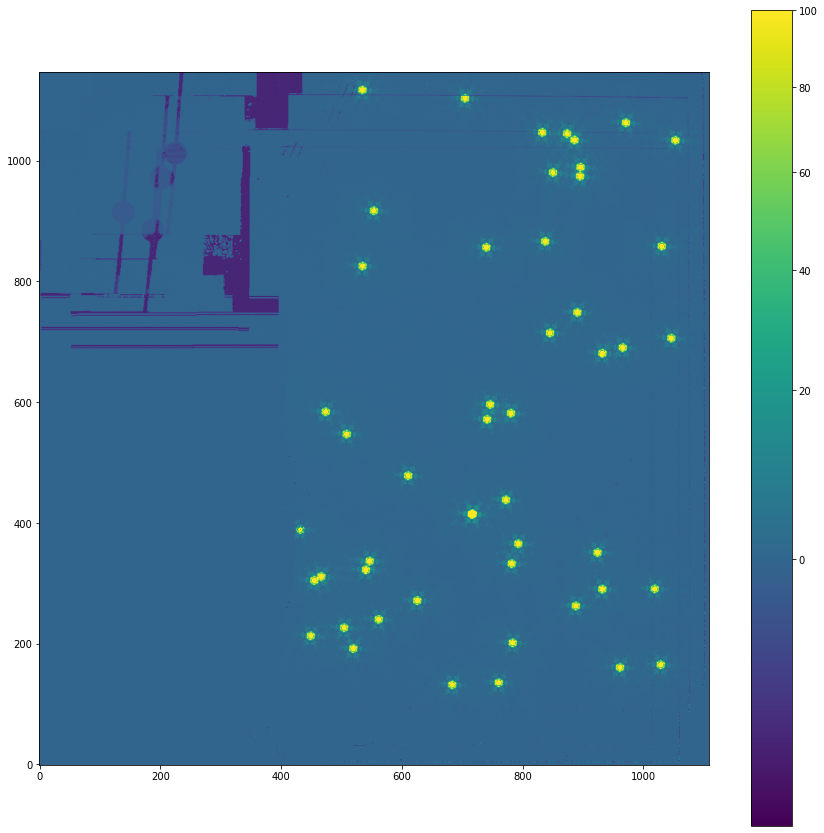

In [9]:
# read in ecsv photom file
from astropy.visualization import LogStretch, PercentileInterval, ManualInterval
from astropy import table
from matplotlib.colors import LogNorm
from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize)

viz1 = LogStretch()
viz2 = LogStretch() + ManualInterval(-12,100)
norm = ImageNormalize(im_i2d.data, interval=MinMaxInterval(),
                      stretch=SqrtStretch())

plt.figure(figsize=(15,15))
#plt.imshow(viz2(im_i2d.data),cmap='gray')
plt.imshow(im_i2d.data,origin='lower',norm=norm,vmin=-12, vmax=100)
plt.colorbar()

### Display combined image with catalog sources overlaid

In [10]:
photfile = 'image3_combined_cat.ecsv'
data = table.Table.read(photfile, format='ascii', comment='#')
print(len(data),' sources detected')

624  sources detected


2021-04-22 20:55:50,368 - stpipe - WARNING - <ipython-input-1-cce6411f04eb>:15: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(im_i2d.data,origin='lower',norm=norm,vmin=-12, vmax=100)



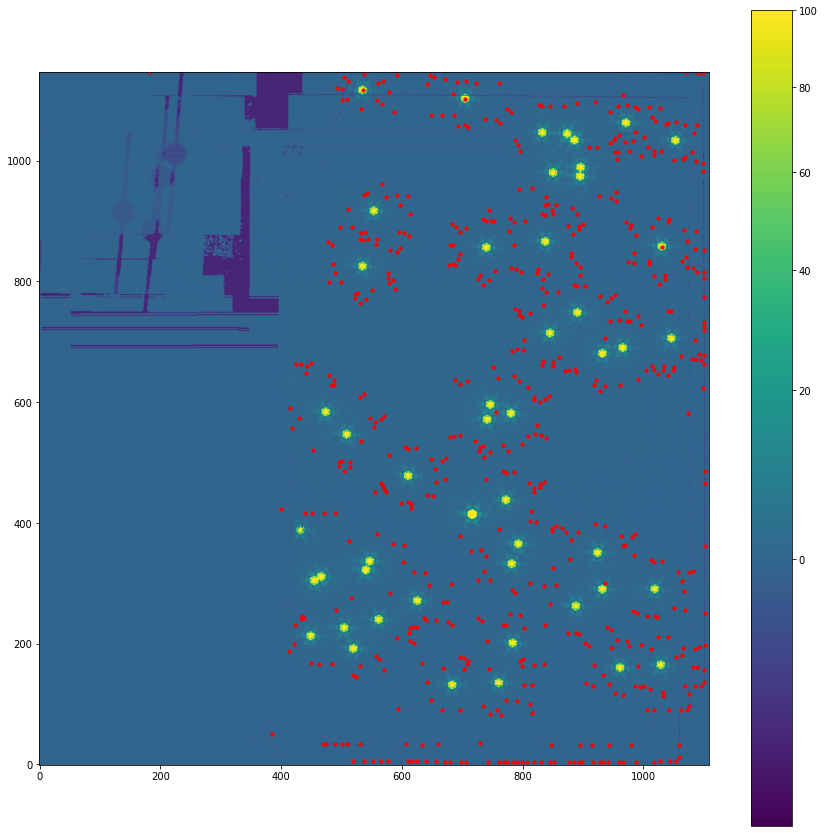

In [11]:
# read in ecsv photom file
from astropy.visualization import LogStretch, PercentileInterval, ManualInterval
from astropy import table
from matplotlib.colors import LogNorm
from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize)

viz1 = LogStretch()
viz2 = LogStretch() + ManualInterval(-12,100)
norm = ImageNormalize(im_i2d.data, interval=MinMaxInterval(),
                      stretch=SqrtStretch())

plt.figure(figsize=(15,15))
#plt.imshow(viz2(im_i2d.data),cmap='gray')
plt.imshow(im_i2d.data,origin='lower',norm=norm,vmin=-12, vmax=100)
plt.colorbar()
plt.scatter(data['xcentroid'], data['ycentroid'],lw=1, s=10,color='red')